# EQUIPO RIGNON

## DESCRIPCIÓN DE LAS VARIABLES

* "gender" = Indica el genero del paciente
* "age"= Indica la edad del paciente
* "hypertension"= Indica si el paciente padece o no de hipertensión
* "heart_disease"= Indica si el paciente padece o no de enfermedad cardiaca
* "ever_married"= Indica si el paciente ha estado o no casado
* "work_type"= Indica el tipo de empleo que desarrolla el paciente
* "Residence_type"= Indica el tipo de vivienda en el que reside el paciente
* "avg_glucose_level"= Indica el nivel de glucosa media estimada del paciente
* "bmi"= Indica el indice de masa corporal que tiene el paciente
* "smoking_status"= Indica si el paciente es o ha sido fumador
* "stroke"= Indica si el paciente ha sufrido un accidente cerebrovascular o ataque cerebral

## Importar librerías a utilizar en el análisis de datos y visualización

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import pearsonr

## Exploración inicial de datos

In [3]:
df = pd.read_csv ('stroke_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
(df[df['age']<2]).age.value_counts()

1.80    9
1.32    8
1.64    8
1.08    7
1.88    7
1.24    7
1.48    6
1.72    6
0.32    5
1.00    5
0.56    5
0.24    5
0.88    5
0.72    5
0.64    4
1.56    4
0.80    4
1.40    3
1.16    3
0.48    3
0.40    2
0.08    2
0.16    1
Name: age, dtype: int64

* Para niños menores a 2 años se tiene en cuenta los meses de vida de estos

In [36]:
len(df[(df['age']<2) & (df['stroke']==1)])

1

- Se identifica a un niño que tuvo un ictus pediátrico

In [37]:
len(df[df.duplicated()])

0

In [48]:
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [38]:
df.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [40]:
df.Residence_type.value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [23]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   urban_residence    4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [42]:
df.rename(columns={'gender': 'female_gender'}, inplace=True)
df.rename(columns={'Residence_type': 'urban_residence'}, inplace=True)

In [44]:
df["female_gender"] = df["female_gender"].apply(lambda x: 1 if x == "Female" else 0)

In [46]:
df["urban_residence"] = df["urban_residence"].apply(lambda x: 1 if x == "Urban" else 0)

In [49]:
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)

In [52]:
df["female_gender"] = df["female_gender"].astype(int)
df["ever_married"] = df["ever_married"].astype(int)
df["urban_residence"] = df["urban_residence"].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   object 
 6   urban_residence    4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(3), int64(3), object(2)
memory usage: 369.8+ KB


In [54]:
df.describe()

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,0.508332,105.943562,28.498173,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.499981,45.075373,6.790464,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.850000,28.100000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,113.860000,32.600000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [76]:
df_stroke = df[df['stroke']==1]
df_stroke_no = df[df['stroke']==0]

In [75]:
df_stroke.describe()

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0
mean,0.581897,67.609138,0.250000,0.176724,0.875000,0.551724,124.301552,29.885345,1.0
std,0.494314,12.867083,0.433949,0.382260,0.331434,0.498393,55.738876,5.461320,0.0
min,0.000000,1.320000,0.000000,0.000000,0.000000,0.000000,56.110000,16.900000,1.0
25%,0.000000,59.000000,0.000000,0.000000,1.000000,0.000000,78.570000,26.775000,1.0
50%,1.000000,71.000000,0.000000,0.000000,1.000000,1.000000,102.515000,29.150000,1.0
75%,1.000000,78.000000,0.250000,0.000000,1.000000,1.000000,185.250000,32.350000,1.0
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,231.610000,47.500000,1.0


In [77]:
df_stroke_no.describe()

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.0
mean,0.584820,41.788648,0.085358,0.046442,0.642657,0.506773,102.241518,28.333692,0.0
std,0.492806,22.294343,0.279444,0.210462,0.479268,0.500008,40.000528,6.804092,0.0
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.0
25%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,76.755000,23.500000,0.0
50%,1.000000,43.000000,0.000000,0.000000,1.000000,1.000000,90.900000,28.000000,0.0
75%,1.000000,59.000000,0.000000,0.000000,1.000000,1.000000,111.480000,32.500000,0.0
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,232.890000,48.700000,0.0


# 3. Ingeniería de características

## 3.2. Detección de *Outliers*

* Outliers de edad

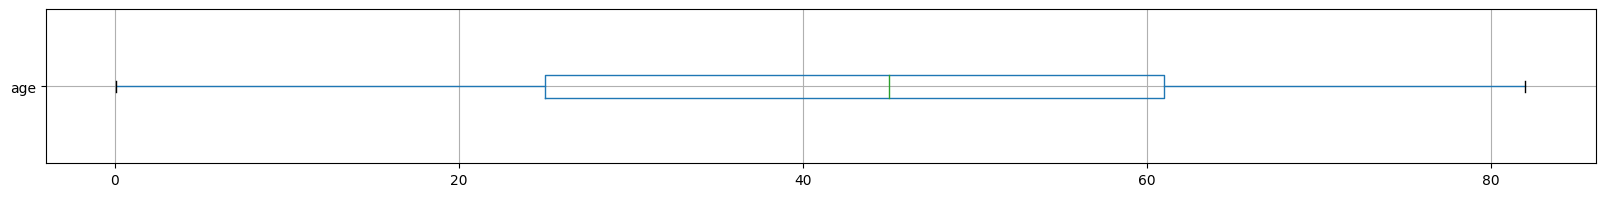

-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:


82.0

In [63]:
df.boxplot(column='age', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:")
df = df[(np.abs(stats.zscore(df["age"])) < 3)]
df['age'].max()

* Outliers de glucosa 

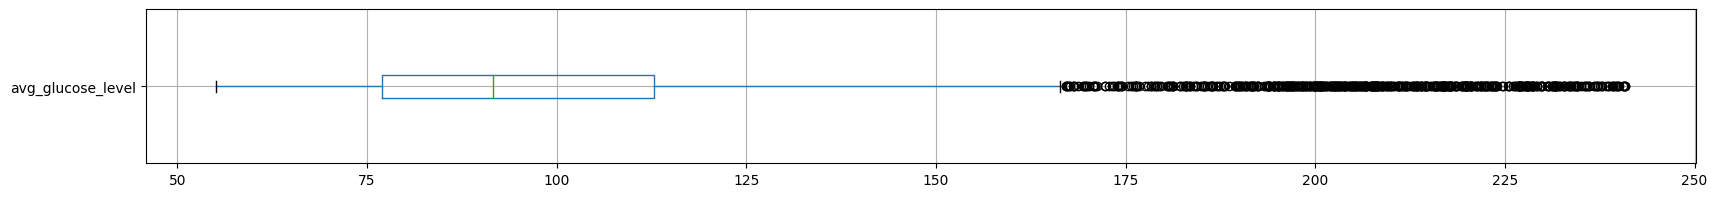

-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:


232.89

In [69]:
df.boxplot(column='avg_glucose_level', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:")
df = df[(np.abs(stats.zscore(df["avg_glucose_level"])) < 3)]
df['avg_glucose_level'].max()

* Outliers de Masa Corporal

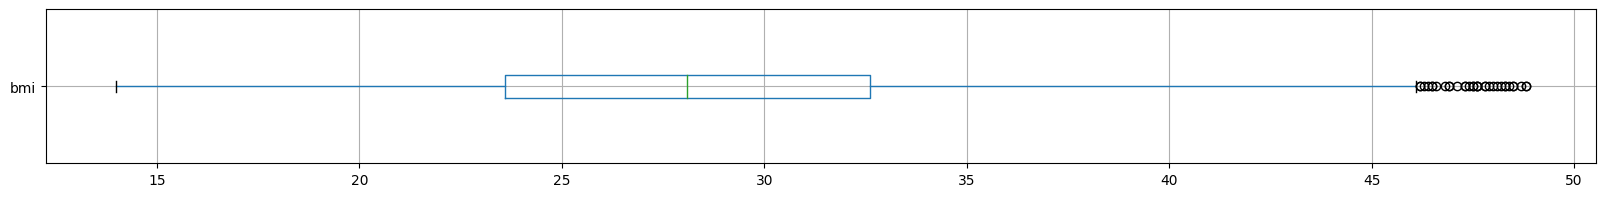

-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:


48.7

In [68]:
df.boxplot(column='bmi', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:")
df = df[(np.abs(stats.zscore(df["bmi"])) < 3)]
df['bmi'].max()

In [78]:
numericas = ["female_gender", "age", "hypertension", "heart_disease", "ever_married", "urban_residence", "avg_glucose_level", "bmi", "stroke"]

In [79]:
corr_matrix = df[numericas].corr(method='spearman')
corr_matrix

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
female_gender,1.000000,0.021583,-0.017199,-0.086102,0.030306,0.002549,-0.047443,-0.010165,-0.001262
age,0.021583,1.000000,0.280961,0.266992,0.665033,0.018242,0.115466,0.380810,0.246491
hypertension,-0.017199,0.280961,1.000000,0.104283,0.160759,-0.002189,0.098302,0.165379,0.120489
heart_disease,-0.086102,0.266992,0.104283,1.000000,0.109872,0.005890,0.095700,0.077175,0.124118
ever_married,0.030306,0.665033,0.160759,0.109872,1.000000,0.007374,0.080008,0.386822,0.103883
urban_residence,0.002549,0.018242,-0.002189,0.005890,0.007374,1.000000,-0.007727,0.009292,0.019128
avg_glucose_level,-0.047443,0.115466,0.098302,0.095700,0.080008,-0.007727,1.000000,0.108381,0.068803
bmi,-0.010165,0.380810,0.165379,0.077175,0.386822,0.009292,0.108381,1.000000,0.055338
stroke,-0.001262,0.246491,0.120489,0.124118,0.103883,0.019128,0.068803,0.055338,1.000000


In [80]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head (50)

,variable_1,variable_2,r,abs_r
37,ever_married,age,0.665033,0.665033
13,age,ever_married,0.665033,0.665033
43,ever_married,bmi,0.386822,0.386822
67,bmi,ever_married,0.386822,0.386822
16,age,bmi,0.380810,0.380810
64,bmi,age,0.380810,0.380810
11,age,hypertension,0.280961,0.280961
19,hypertension,age,0.280961,0.280961
12,age,heart_disease,0.266992,0.266992
28,heart_disease,age,0.266992,0.266992


<AxesSubplot:>

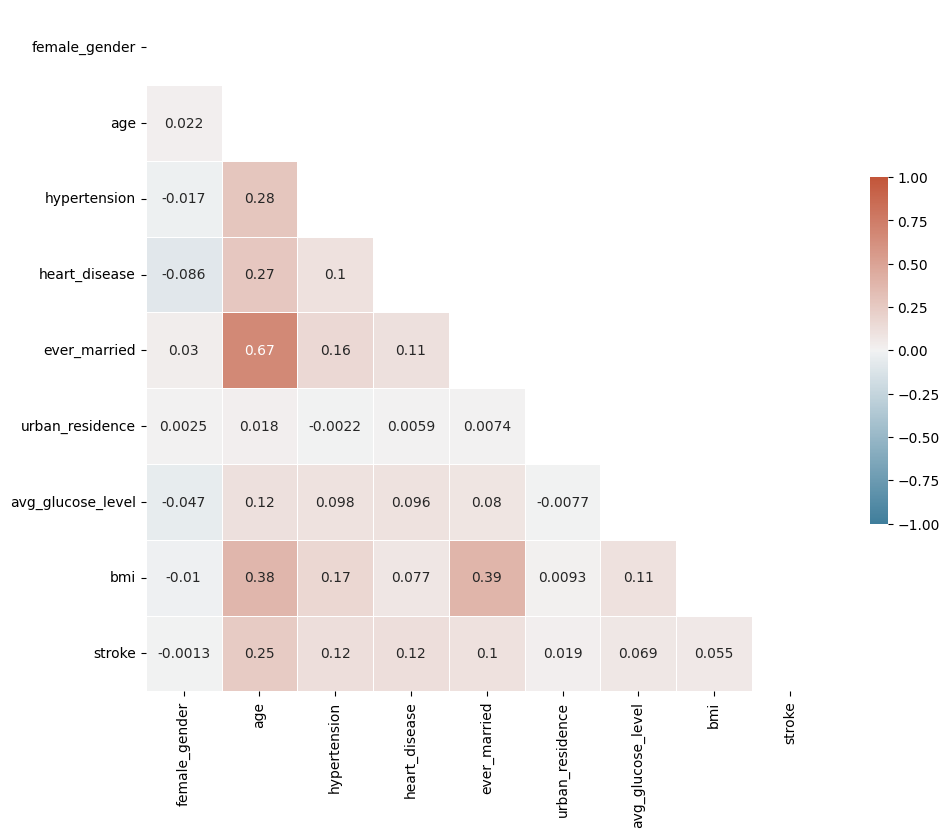

In [85]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


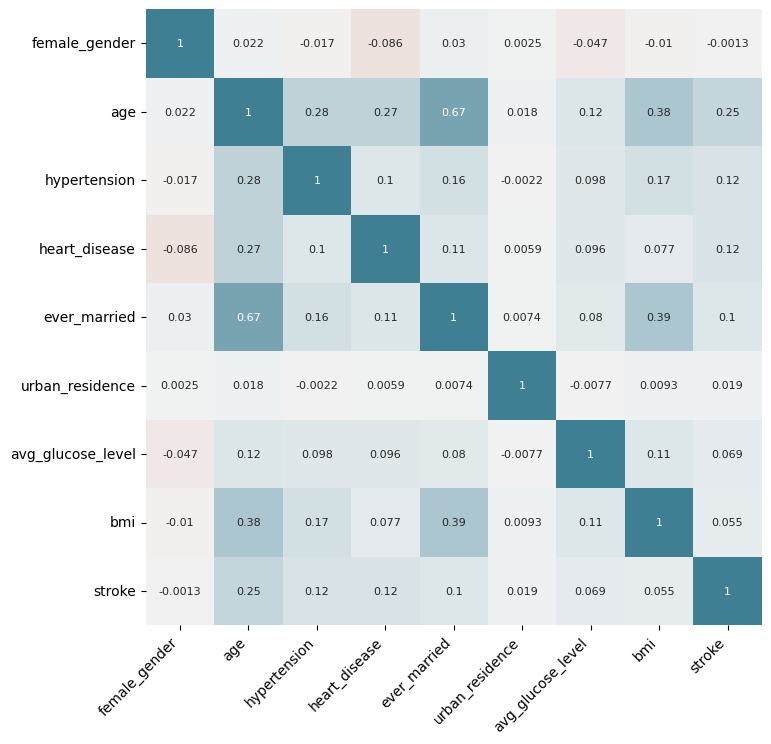

In [82]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)